# Decision Tree - EDA and Training

#### Import Packages and Dataset


In [2]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Import DataSet

total_data = pd.read_csv('/workspaces/gustavolima-decisiontree/data/raw/decision-tree_diabetes.csv')
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### DataSet Analysis

##### Dataset Information

In [6]:
# Dataset Shape
total_data.shape

(768, 9)

In [8]:
# Dataset Data Info
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Duplicate Removal
if total_data.duplicated().sum() > 0 :
    total_data.drop_duplicates()

#### Univariate Numeric Analysis

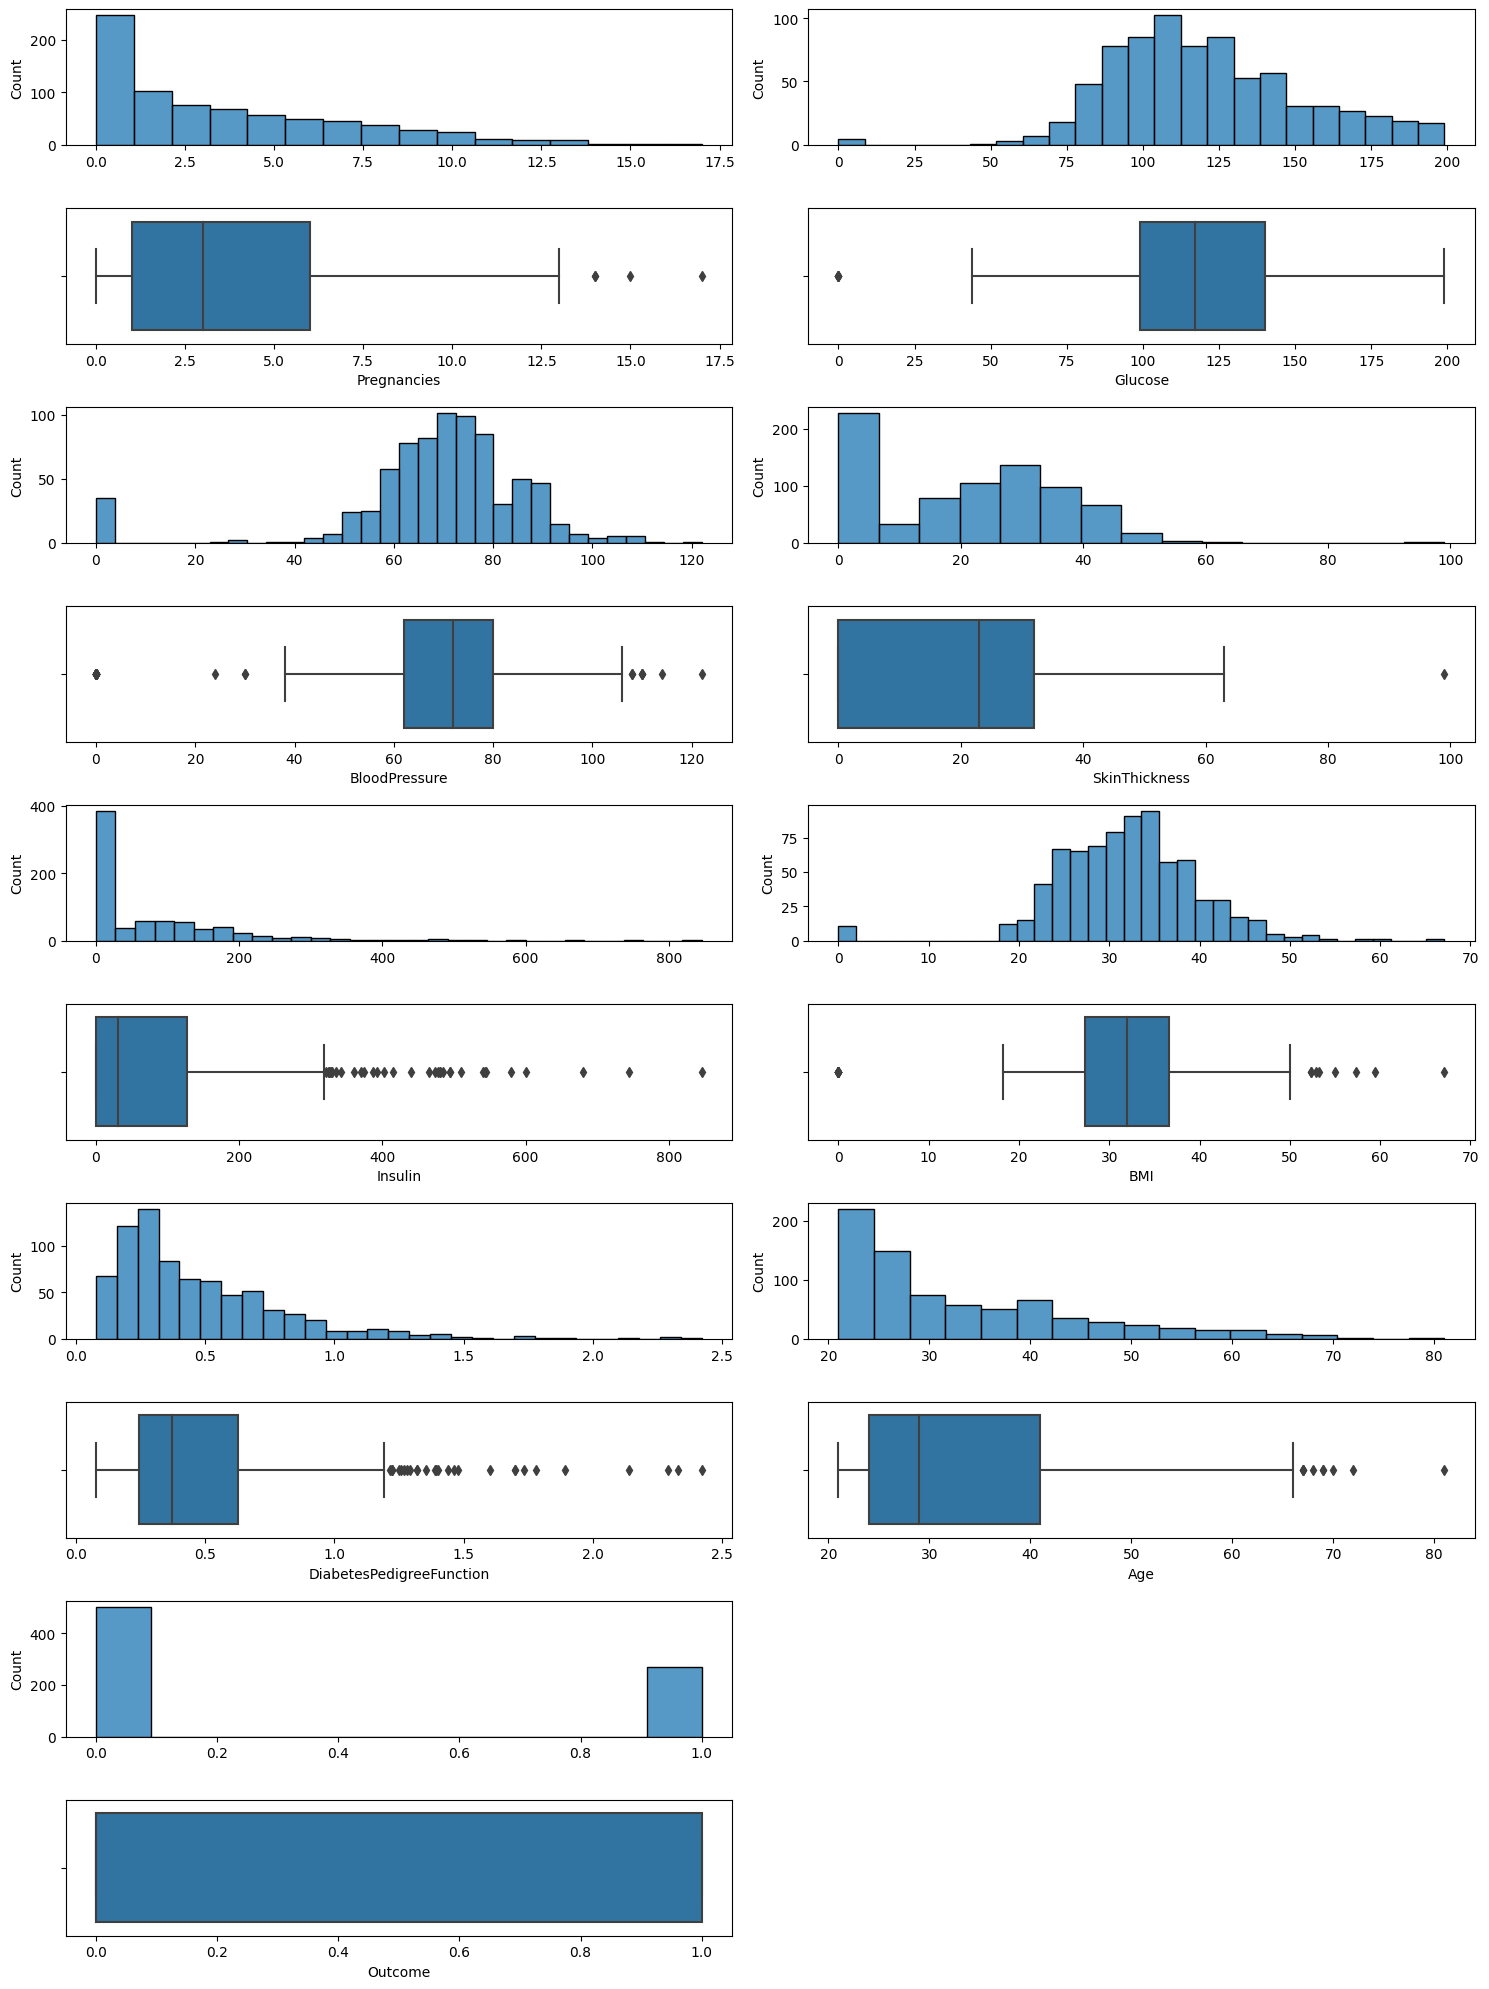

In [21]:
# Univariate Numeric Analysis

# Gather all columns in a variable-
column_names = total_data.columns

# Create Figure
fig, axis = plt.subplots(10, 2, figsize=(15, 20))

# Plot the Data
# Iterate through each column and plot histograms and box plots
for i, col_name in enumerate(column_names):
    if i % 2 == 0 :
        sns.histplot(ax=axis[i, 0], data=total_data, x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i + 1, 0 ], data=total_data, x=col_name)
    else :
        sns.histplot(ax=axis[i - 1, 1], data=total_data, x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i , 1 ], data=total_data, x=col_name)
fig.delaxes(axis[8,1])
fig.delaxes(axis[9,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Looking at the Numeric Data Analysis:

- There are a few 0 values, which are guaranteed errors, as if their value is 0, it means you either dead or don't exist (Glucose, Bloodpressure, BMI)
- Apart from that, data is distrubuted normally in many of the cases
- The present outliers (other than 0) are OK and important for the Data Analysis

#### Multivariate Numerical Data Analysis

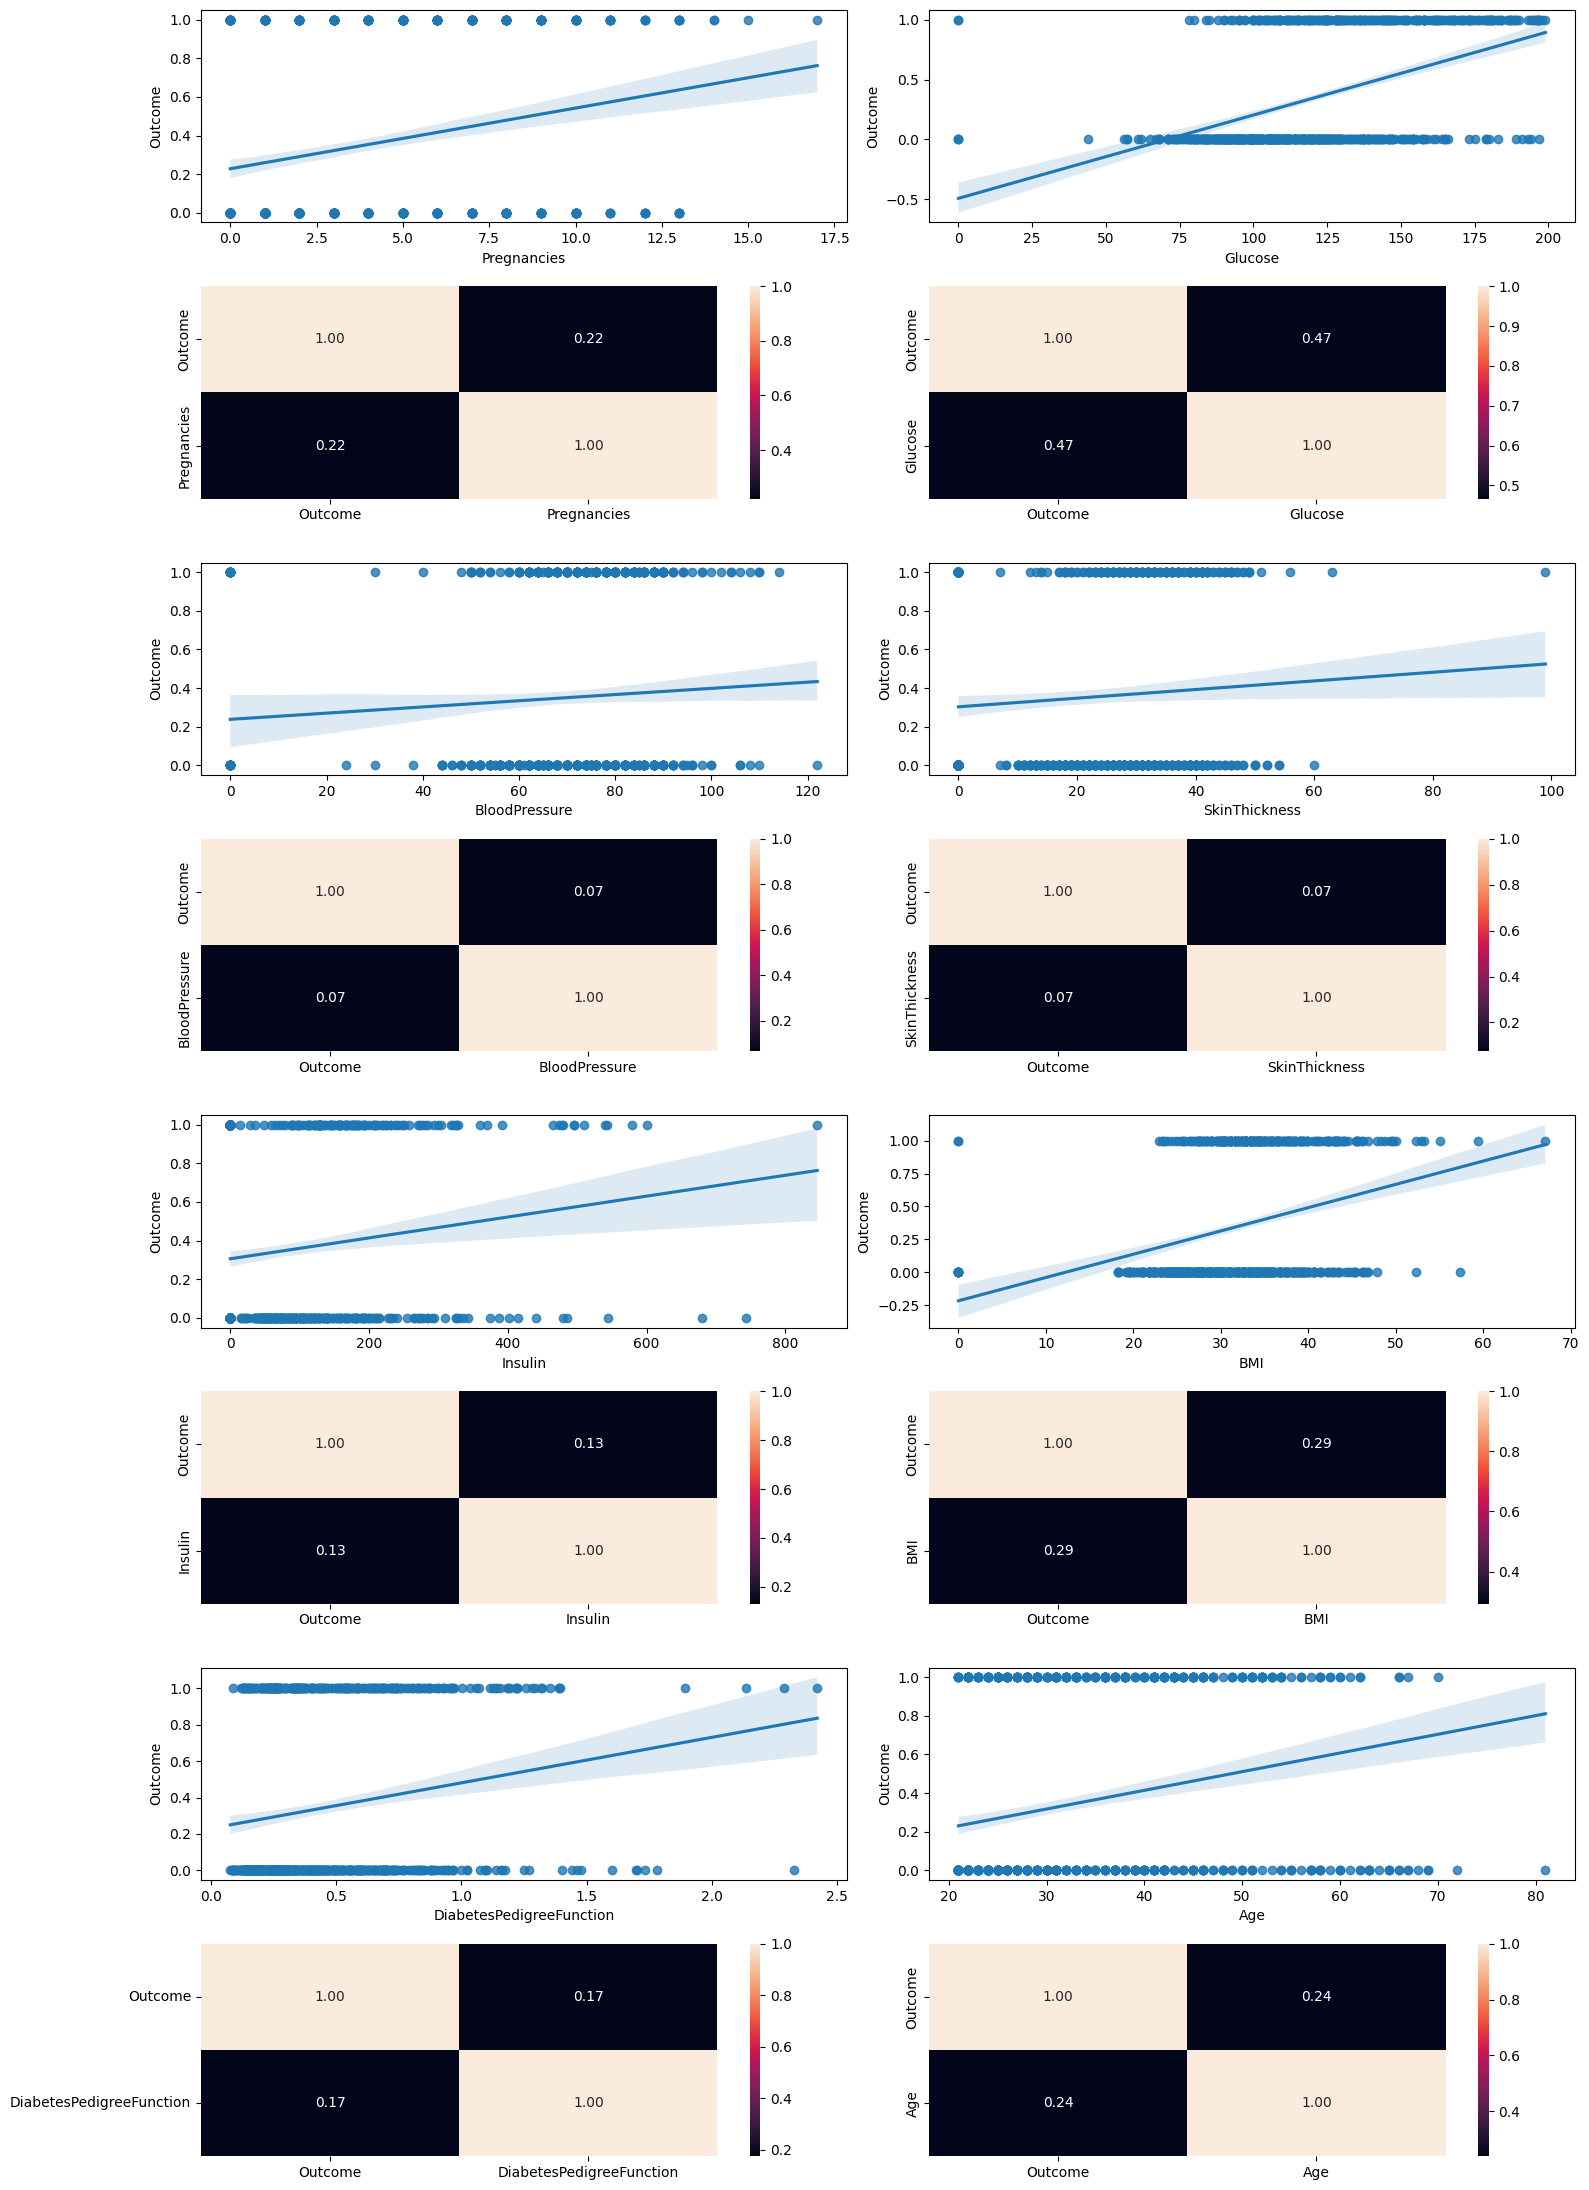

In [29]:
# Multivariate Numerical Data Analysis

# List of column names from your dataset
column_names = total_data.loc[:, total_data.columns != 'Outcome'].columns

# Create the subplots with custom height ratios
fig, axis = plt.subplots(8, 2, figsize=(16, 22))

# Iterate through each column and plot histograms and box plots
for i, col_name in enumerate(column_names):
    if i % 2 == 0:
        sns.regplot(ax=axis[i, 0], data=total_data, x=col_name, y='Outcome')
        sns.heatmap(total_data[['Outcome', col_name]].corr(), annot=True, fmt=".2f", ax=axis[i + 1, 0])
    else:
        sns.regplot(ax=axis[i - 1, 1], data=total_data, x=col_name, y='Outcome')
        sns.heatmap(total_data[['Outcome', col_name]].corr(), annot=True, fmt=".2f", ax=axis[i, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

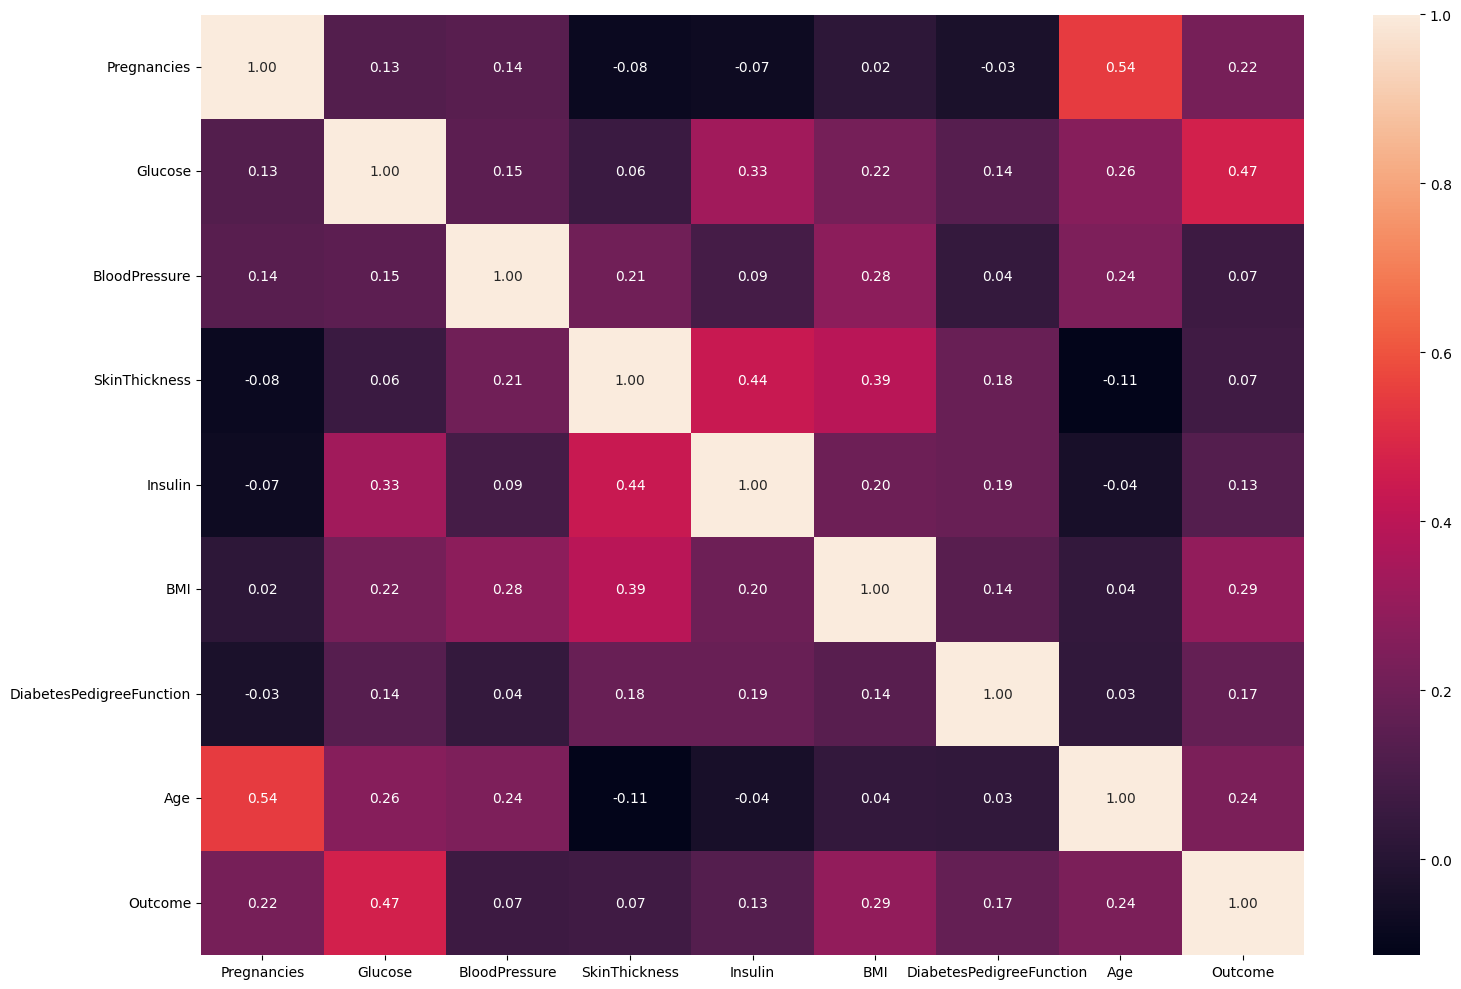

In [31]:
# Heatmap of Dataset

# Draw Figure
fig, axis = plt.subplots(figsize=(16, 10))

# Plot Heatmap

sns.heatmap(total_data.corr(), annot=True, fmt='.2f')

# Adjust Plot
plt.tight_layout()

#Show Plot
plt.show()

Looking at the Heatmap: 

- Glucose is highly correlated with the Outcome of Being Diabetic
- We can also see that Insulin, BMI, DiabetesPedigreeFunction, Age

#### Feature Engineering

In [32]:
# DataSet Data Description

total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
